# Data analysis and figure reproduction (JMPS bifurcation paper)

This notebook reproduces the **numerical/plotting-side** figures in the paper by combining:
- **FEM outputs** (saved in `../FEM/output/...`), and
- **analytical base-state + bifurcation predictions** (from the Python classes in `../classes`).

**Where to look (paper mapping):**
- **Fig. 2**: base-state pressure–stretch curve and radial damage profiles.
- **Fig. 4–5**: pressure–stretch curves with **analytical bifurcation markers** (modes \(n=2,\dots,6\)) and **FEM comparison**.
- **Figs. 6–7 + SI**: phase diagrams built from parameter-sweep JSON outputs.

> Tip: Run cells top-to-bottom. To reproduce a different figure, only change the folder paths and/or sweep settings in the “User inputs” cells.


## 1. Setup: imports, paths, and base-state (axisymmetric) solution

We first:
1. Add the project root to `sys.path` so we can import the shared `classes` utilities.
2. Select a **single FEM output folder** (`FEM_FOLDER`) corresponding to one geometry/parameter set.
3. Parse \((A,B,\mu,\ell,G_c)\) from the folder name.
4. Load the FEM pressure–stretch curve (and, optionally, saved damage diagnostics).
5. Compute the **axisymmetric analytical branch** by solving the base-state equilibrium/damage ODEs.

This establishes the ingredients needed for **Fig. 2** and for overlaying bifurcation thresholds in **Fig. 4–5**.


In [1]:
import sys

sys.path.append('../')
from classes import *
# from fem_equilibrium_bifurcation_combo import *
import matplotlib.pyplot as plt
import matplotlib.cm as cm

FEM_FOLDER = ("../FEM/output/circular_AT2C1_10.00_C2_0.50_R_void_0.20_mu_1.00_ell_0.100_Gc_1.0_ld-stps_501_max-ld_1.00")
# FEM_FOLDER = ("../FEM/output/BifurcationPaper/circular_AT2C1_10.00_C2_0.33_R_void_0.30_mu_1.00_ell_0.100_Gc_1.0_ld-stps_501_max-ld_2.00")

# --- Parse parameters from FEM folder ---
A, B, mu, ell, Gc = parse_parameters_from_folder(FEM_FOLDER)
print("Parameters from FEM folder:")
print(f"  A   = {A}")
print(f"  B   = {B}")
print(f"  mu  = {mu}")
print(f"  ell = {ell}")
print(f"  Gc  = {Gc}")
print()

# --- Load FEM pressure–stretch curve ---
# lambda_a_fem, lambda_b_fem, P_over_mu_fem = load_fem_pressure_curve(
#     FEM_FOLDER, A, B
# )

lambda_a_fem, lambda_b_fem, P_over_mu_fem, damage_R, damage_inner, damage_outer = load_fem_pressure_curve(
    FEM_FOLDER, A, B,
    load_damage=True,
    boundary_damage_filename="boundary_damage.txt",   # if only one exists
)
# --- Compute equilibrium (axisymmetric) curve ---
lambda_a_eq, P_over_mu_eq, eq, sym = compute_equilibrium_curve(
    A=A,
    B=B,
    mu=mu,
    ell=ell,
    Gc=Gc,
    damage_model=DAMAGE_MODEL,
    Jm=Jm,
    lambda_a_min=LAMBDA_A_MIN,
    lambda_a_max=7,
    n_lambda=N_LAMBDA_A,
)


Loading symbolic packages.
Parameters from FEM folder:
  A   = 0.2
  B   = 1.0
  mu  = 1.0
  ell = 0.1
  Gc  = 1.0

Symbolic problem initialized.


## 2. Base-state validation (Fig. 2)

### 2a. Pressure–stretch curve (Fig. 2a)
We compare:
- **FEM** (black),
- **purely elastic** analytical response (no damage),
- **axisymmetric damaged** analytical response (base-state branch).

The “no damage” curve is the closed-form neo-Hookean cavity result (same formula used in the paper).

### 2b. Radial damage profiles (Fig. 2b)
We then plot $\alpha(R)$ across the reference thickness $R\in[A,B]$ at selected stretches.
In the paper, these profiles show that FEM matches the axisymmetric analytical solution prior to symmetry breaking.


/Users/hudson/MIT Dropbox/Hudson Rocha/Damage/Git/bifurcation/Submit/notebooks/../classes/equilibrium.py:403: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  sigma, _ = quad(integrand_s, self.a, r)
/Users/hudson/MIT Dropbox/Hudson Rocha/Damage/Git/bifurcation/Submit/notebooks/../classes/equilibrium.py:403: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  sigma, _ = quad(integrand_s, self.a, r)


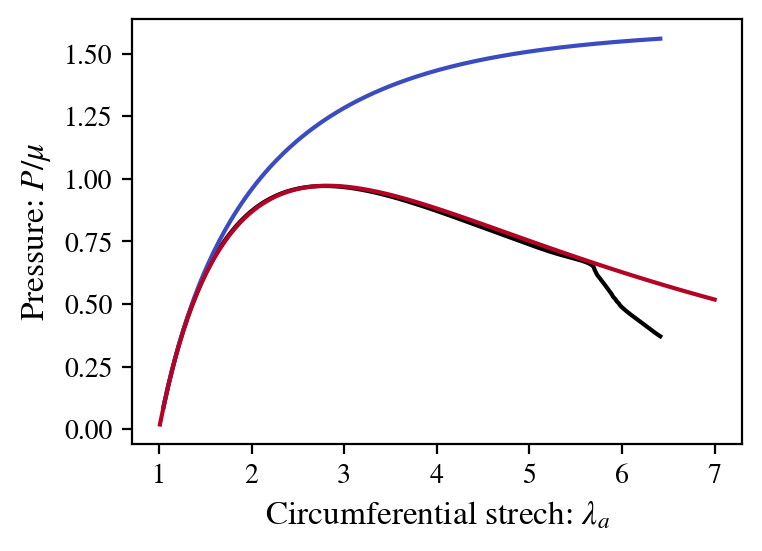

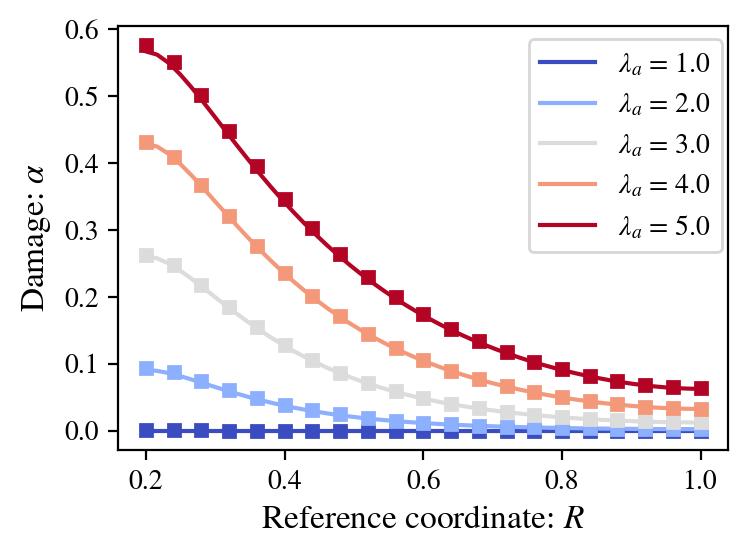

In [2]:

P = (np.log(lambda_a_fem/lambda_b_fem) - 0.5 * (1/lambda_a_fem**2 - 1/lambda_b_fem**2))

import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
cent = 1/2.54  # centimeters in inches
# plt.figure(figsize=(8*cent, 6*cent))

fig = plt.figure(figsize=(10*cent , 7*cent ), dpi = 200)
plt.plot(lambda_a_fem, P_over_mu_fem, "-", color = 'k', label = "FEM")
plt.plot(lambda_a_fem, P, label = r'no damage',color=cm.coolwarm(0/3))
plt.plot(lambda_a_eq, P_over_mu_eq, label = r'Analytical',color=cm.coolwarm(3/3))
plt.xlabel(r'Circumferential strech: $\lambda_a$', fontsize = 12)
plt.ylabel(r'Pressure: $P/\mu$', fontsize = 12)

# plt.savefig(FEM_FOLDER + "/pressure.eps",  bbox_inches='tight')

list_of_stretches = [1, 2, 3, 4, 5 ]
Reference_coordinate = np.linspace(A,B)


import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
cent = 1/2.54  # centimeters in inches
# plt.figure(figsize=(8*cent, 6*cent))

fig = plt.figure(figsize=(10*cent , 7*cent ), dpi = 200)
for i, stretch in enumerate(list_of_stretches):
    eq.a = stretch * eq.A
    eq.b = (eq.a**2 + eq.B**2 - eq.A**2 ) ** 0.5
    eq.get_pressure()
            # print(eq.pressure(B))
    eq.get_damage()
    plt.plot(Reference_coordinate, [eq.alpha(np.sqrt(R**2- eq.A**2+ eq.a**2)) for R in Reference_coordinate],  color=cm.coolwarm(i/(len(list_of_stretches)-1)), label=r'$\lambda_a$ = {:.1f}'.format(stretch))
    # plt.plot(Reference_coordinate, eq.alpha(Reference_coordinate),  color=cm.coolwarm(i/(len(list_of_stretches)-1)), label=r'$\lambda_a$ = {:.1f}'.format(stretch))

plt.xlabel(r'Reference coordinate: $R$', fontsize = 12)
plt.ylabel(r'Damage: $\alpha$', fontsize = 12)
plt.legend(bbox_to_anchor=(.65, 1.0), loc='upper left')

import math
def find_nearest(array,value):
    idx = np.searchsorted(array, value, side="left")
    if idx > 0 and (idx == len(array) or math.fabs(value - array[idx-1]) < math.fabs(value - array[idx])):
        return [idx, array[idx-1]]
    else:
        return [idx, array[idx]]


# np.loadtxt(FEM_FOLDER + "/damage.txt")
# fig = plt.figure(figsize=(10*cent , 7*cent ), dpi = 600)
Reference_coordinate_FEM = np.linspace(A,B, len(damage_R[0]))
for i, stretch in enumerate(list_of_stretches):
    [ind, stretch] = find_nearest(lambda_a_fem, stretch)
    plt.plot(Reference_coordinate_FEM[::10] ,damage_R[ind][::10], 's',markersize = 4, color=cm.coolwarm(i/(len(list_of_stretches)-1)))

# plt.savefig(folder + '/Damage.eps',  bbox_inches='tight')

## 3. Bifurcation thresholds on the pressure–stretch curve (Fig. 4)

We now compute the **critical inner stretch** $\lambda_a^{\mathrm{crit}}(n)$ for Fourier modes $n=2,\dots,6$ by solving the incremental boundary-value problem and enforcing the determinant condition (paper Eq. (55)).

The helper `compute_bifurcation_points(...)`:
- solves the incremental system for each mode $n$,
- treats $\lambda_a$ as the continuation/root-finding variable,
- returns the first $\lambda_a$ at which a non-trivial solution exists.

Finally, we overlay these bifurcation points as markers on the analytical pressure–stretch curve and compare to FEM (main panel). The inset shows the **circumferential damage** on the cavity boundary extracted from the FEM output folder, matching the inset style in Fig. 4a.



=== Bifurcation analysis for mode n = 2 ===
  -> λ_a^crit (n=2) = 2.7967, P^crit/μ = 0.9721

=== Bifurcation analysis for mode n = 3 ===
  -> λ_a^crit (n=3) = 2.7987, P^crit/μ = 0.9721

=== Bifurcation analysis for mode n = 4 ===
  -> λ_a^crit (n=4) = 2.9919, P^crit/μ = 0.9694

=== Bifurcation analysis for mode n = 5 ===
  -> λ_a^crit (n=5) = 3.2430, P^crit/μ = 0.9566

=== Bifurcation analysis for mode n = 6 ===
  -> λ_a^crit (n=6) = 3.5183, P^crit/μ = 0.9341


/Users/hudson/MIT Dropbox/Hudson Rocha/Damage/Git/bifurcation/Submit/notebooks/../classes/utils.py:295: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  ax1.plot(


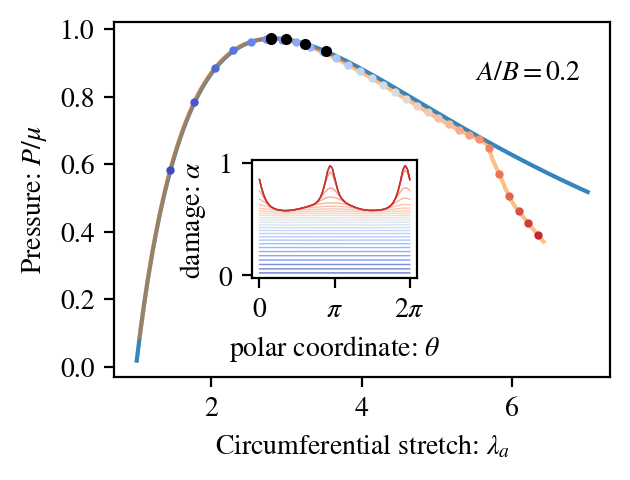

In [3]:

# --- Run bifurcation analysis for modes n = 2,...,6 ---
crit_data = compute_bifurcation_points(
    eq=eq,
    sym=sym,
    modes=MODES,
    boundary_condition=BOUNDARY_CONDITION,
    x0=2.0,
    dx=0.1,
    solver="ridder",
    tol=1e-4,
)

fig, ax1, ax_in = plot_pressure_stretch_with_damage_inset(
    FEM_FOLDER=FEM_FOLDER,
    lambda_a_eq=lambda_a_eq,
    P_over_mu_eq=P_over_mu_eq,
    lambda_a_fem=lambda_a_fem,
    P_over_mu_fem=P_over_mu_fem,
    lambdab=lambda_b_fem,
    crit_data=crit_data,
    MODES=MODES,
    lambda_a_max=7.0,          
    marker_stride=10,
    marker_start=10,
    A=A, B=B, Gc=Gc, mu=mu, ell=ell,
    savepath=os.path.join(FEM_FOLDER, "pressure_stretch_2.png"),
    show=True,
    text_pos_ab=(5.5, 0.85),
)

## 4. Repeat for a second geometry/parameter set (Fig. 5)

To reproduce **Fig. 5**, we switch `FEM_FOLDER` to a simulation with a different geometry (e.g. $A/B$) while keeping the same material parameters, then recompute:
- the axisymmetric analytical branch, and
- the bifurcation thresholds $\lambda_a^{\mathrm{crit}}(n)$.

This case typically selects a different critical mode (e.g. $n=3$ rather than $n=2$).


In [4]:


import matplotlib.pyplot as plt
import matplotlib.cm as cm

# FEM_FOLDER = ("../FEM/output/circular_AT2C1_10.00_C2_0.50_R_void_0.20_mu_1.00_ell_0.100_Gc_1.0_ld-stps_501_max-ld_1.00")
FEM_FOLDER = ("../FEM/output/circular_AT2C1_10.00_C2_0.33_R_void_0.30_mu_1.00_ell_0.100_Gc_1.0_ld-stps_501_max-ld_2.00")

# --- Parse parameters from FEM folder ---
A, B, mu, ell, Gc = parse_parameters_from_folder(FEM_FOLDER)
print("Parameters from FEM folder:")
print(f"  A   = {A}")
print(f"  B   = {B}")
print(f"  mu  = {mu}")
print(f"  ell = {ell}")
print(f"  Gc  = {Gc}")
print()

# --- Load FEM pressure–stretch curve ---
lambda_a_fem, lambda_b_fem, P_over_mu_fem, damage_R, damage_inner, damage_outer = load_fem_pressure_curve(
    FEM_FOLDER, A, B,
    load_damage=True,
    boundary_damage_filename="boundary_damage.txt",   # if only one exists
)

# --- Compute equilibrium (axisymmetric) curve ---
lambda_a_eq, P_over_mu_eq, eq, sym = compute_equilibrium_curve(
    A=A,
    B=B,
    mu=mu,
    ell=ell,
    Gc=Gc,
    damage_model=DAMAGE_MODEL,
    Jm=Jm,
    lambda_a_min=LAMBDA_A_MIN,
    lambda_a_max=LAMBDA_A_MAX,
    n_lambda=N_LAMBDA_A,
)



Parameters from FEM folder:
  A   = 0.3
  B   = 1.0
  mu  = 1.0
  ell = 0.1
  Gc  = 1.0

Symbolic problem initialized.


### 4a. Pressure–stretch curve with bifurcation markers (Fig. 5a)

Same workflow as Fig. 4a: compute the critical stretches for $n=2,\dots,6$, then overlay them on the analytical curve and compare to FEM (with the FEM damage inset).



=== Bifurcation analysis for mode n = 2 ===
  -> λ_a^crit (n=2) = 3.1179, P^crit/μ = 0.7254

=== Bifurcation analysis for mode n = 3 ===
  -> λ_a^crit (n=3) = 2.7436, P^crit/μ = 0.7637

=== Bifurcation analysis for mode n = 4 ===
  -> λ_a^crit (n=4) = 2.8219, P^crit/μ = 0.7573

=== Bifurcation analysis for mode n = 5 ===
  -> λ_a^crit (n=5) = 2.9823, P^crit/μ = 0.7413

=== Bifurcation analysis for mode n = 6 ===
  -> λ_a^crit (n=6) = 3.1805, P^crit/μ = 0.7176


/Users/hudson/MIT Dropbox/Hudson Rocha/Damage/Git/bifurcation/Submit/notebooks/../classes/utils.py:295: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  ax1.plot(


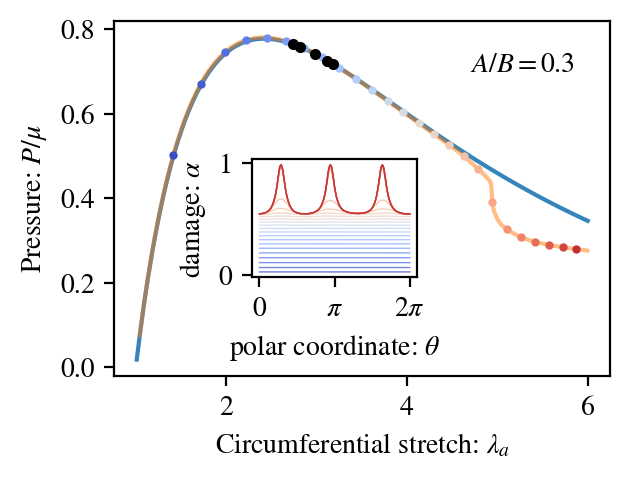

In [5]:
# --- Run bifurcation analysis for modes n = 2,...,6 ---
crit_data = compute_bifurcation_points(
    eq=eq,
    sym=sym,
    modes=MODES,
    boundary_condition=BOUNDARY_CONDITION,
    x0=2.0,
    dx=0.1,
    solver="ridder",
    tol=1e-4,
)

fig, ax1, ax_in = plot_pressure_stretch_with_damage_inset(
    FEM_FOLDER=FEM_FOLDER,
    lambda_a_eq=lambda_a_eq,
    P_over_mu_eq=P_over_mu_eq,
    lambda_a_fem=lambda_a_fem,
    P_over_mu_fem=P_over_mu_fem,
    lambdab=lambda_b_fem,
    crit_data=crit_data,
    MODES=MODES,
    lambda_a_max=6.0,          
    marker_stride=10,
    marker_start=10,
    A=A, B=B, Gc=Gc, mu=mu, ell=ell,
    savepath=os.path.join(FEM_FOLDER, "pressure_stretch.png"),
    show=True,
    text_pos_ab=(4.7, 0.7),
    # text_pos_gc=(4.3, 0.7)
)

## 5. Phase diagrams from parameter sweeps (Figs. 6–7 and SI)

The phase diagrams are generated from **JSON files** produced by the bifurcation sweep scripts.
Each JSON typically contains:
- a `meta` block specifying which parameter was swept (e.g. `x_axis_key = "B_over_A"`),
- a `data` block with entries `n=2`, `n=3`, … holding arrays of:
  - the swept x-values, and
  - the corresponding **critical inner stretch** $\lambda_a^{\mathrm{crit}}$.

The code below:
1. Loads one (or many) JSON files from `RAW_ROOT/<which>/`.
2. For each file, plots $\lambda_a^{\mathrm{crit}}$ vs the swept parameter for each mode $n$.
3. Saves figures into `OUT_ROOT/<which>/`.

This is the notebook equivalent of the plotting helper used to build Figs. 6–7.


In [6]:
# plot_critical_stretch_from_raw.py
from __future__ import annotations

import os
import glob
import json
import math
from dataclasses import dataclass
from typing import Any, Dict, List, Tuple, Optional

import matplotlib.pyplot as plt
import matplotlib.cm as cm


# ----------------------------
# Data containers
# ----------------------------
@dataclass
class ModeSeries:
    n: int
    x: List[float]
    y: List[float]


# ----------------------------
# I/O + parsing
# ----------------------------
def _is_finite(v: Any) -> bool:
    try:
        fv = float(v)
    except Exception:
        return False
    return math.isfinite(fv)


def load_json(path: str) -> Dict[str, Any]:
    with open(path, "r") as f:
        return json.load(f)


def extract_lambda_a_crit(doc: Dict[str, Any]) -> Tuple[str, List[ModeSeries]]:
    """
    Returns:
        xkey: name of swept parameter (from meta["x_axis_key"])
        series: list of (mode n, x-array, lambda_a_crit-array)
    """
    meta = doc.get("meta", {})
    data = doc.get("data", {})
    xkey = meta.get("x_axis_key", None)
    if not xkey:
        raise ValueError("JSON is missing meta['x_axis_key'].")

    series: List[ModeSeries] = []
    for mode_key, block in data.items():
        if not isinstance(block, dict) or not mode_key.startswith("n="):
            continue

        try:
            n = int(mode_key.split("=")[1])
        except Exception:
            continue

        if xkey not in block or "lambda_a_crit" not in block:
            continue

        xs = block[xkey]
        ys = block["lambda_a_crit"]
        if not isinstance(xs, list) or not isinstance(ys, list) or len(xs) != len(ys):
            continue

        pairs = [(float(x), float(y)) for x, y in zip(xs, ys) if _is_finite(x) and _is_finite(y)]
        pairs.sort(key=lambda t: t[0])

        if pairs:
            series.append(ModeSeries(n=n, x=[p[0] for p in pairs], y=[p[1] for p in pairs]))

    series.sort(key=lambda s: s.n)
    if not series:
        raise ValueError("No mode series found: expected data['n=k'][xkey] and data['n=k']['lambda_a_crit'].")

    return xkey, series




### 5a. Plot a single sweep JSON (sanity check)

Use this when you want to inspect one specific sweep output (one JSON file).
The resulting plot shows multiple mode branches $\lambda_a^{\mathrm{crit}}(n)$ as a function of the swept parameter.


In [9]:
# ----------------------------
# Plotting
# ----------------------------
def plot_one_json(
    json_path: str,
    outdir: str,
    plot_modes: bool = True,
    save_png: bool = False,
    show: bool = False,
) -> None:
    doc = load_json(json_path)
    xkey, series = extract_lambda_a_crit(doc)
    base = os.path.splitext(os.path.basename(json_path))[0]
    os.makedirs(outdir, exist_ok=True)

    # Per-mode curves
    if plot_modes:
        plt.figure()
        cent = 1/2.54  # centimeters in inches
        plt.figure(figsize=(8*cent, 6*cent))
        for i, s in enumerate(series):
            if xkey == "Gc_over_mu_ell":
                plt.semilogx(s.x, s.y, lw =1, label=r'n = {}'.format(s.n), color=cm.coolwarm(i/(len(series) - 1)))
                plt.xlabel(r'$G_c/(\mu\ell)$', fontsize=11)
                plt.ylim([1.2, 6.5])
                
            elif xkey == "ell_over_A":
                plt.plot(s.x, s.y, lw =1, label=r'n = {}'.format(s.n), color=cm.coolwarm(i/(len(series) - 1)))
                plt.xlabel(r'$\ell/A$', fontsize=11)
                plt.ylim([2, 3.])
            elif xkey == "B_over_A":
                # plt.plot(s.x, s.y, marker="none", linestyle="-", label=f"n={s.n}")
                plt.plot(s.x, s.y, lw =1, label=r'n = {}'.format(s.n), color=cm.coolwarm(i/(len(series) - 1)))

        # plt.xlabel(xkey, fontsize=11)
        plt.ylabel(r"Inner Stretch: $\lambda_a$", fontsize=11)
        # plt.title(base)
        # plt.legend()
        plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

        # plt.tight_layout()
        if save_png:
            plt.savefig(os.path.join(outdir, f"{base}__lambda_a_crit_by_mode.png"), dpi=600, bbox_inches='tight')
            plt.savefig(os.path.join(outdir, f"{base}__lambda_a_crit_by_mode.eps"), dpi=600, bbox_inches='tight')
    if show:
        plt.show()
    else:
        plt.close("all")


def plot_folder(
    phase_diagram_type: str,
    raw_root: str = "data/raw",
    out_root: str = "figures",
    pattern: str = "*.json",
    plot_modes: bool = False,
    show: bool = False,
) -> None:
    """
    phase_diagram_type in {"B_over_A", "Gc_over_mu_ell", "ell_over_A"}
    Reads all JSONs in data/raw/<phase_diagram_type>/ and plots each one.
    """
    folder = os.path.join(raw_root, phase_diagram_type)
    paths = sorted(glob.glob(os.path.join(folder, pattern)))
    if not paths:
        raise FileNotFoundError(f"No JSON files found in: {folder} (pattern={pattern})")

    outdir = os.path.join(out_root, phase_diagram_type)
    for p in paths:
        plot_one_json(
            p,
            outdir=outdir,
            plot_modes=plot_modes,
            show=show,
        )
    print(f"[OK] Plotted {len(paths)} file(s) from {folder} -> {outdir}")


def run(
    which: str,
    raw_root: str = "data/raw",
    out_root: str = "figures",
    pattern: str = "*.json",
    plot_modes: bool = False,
    show: bool = True,
) -> None:
    """
    Convenience wrapper so you can call run(...) from your main code without argparse.
    """
    allowed = {"B_over_A", "Gc_over_mu_ell", "ell_over_A"}
    if which not in allowed:
        raise ValueError(f"which must be one of {sorted(allowed)}")

    plot_folder(
        phase_diagram_type=which,
        raw_root=raw_root,
        out_root=out_root,
        pattern=pattern,
        plot_modes=plot_modes,
        show=show,
    )



### 5b. User inputs: choose sweep type and paths

- `WHICH` selects the subfolder under `RAW_ROOT` (`B_over_A`, `Gc_over_mu_ell`, or `ell_over_A`).
- `PATTERN` can be used to restrict to one JSON file (useful for debugging), or left as `"*.json"` to plot everything.
- `plot_modes=True` generates the multi-branch plot (one curve per mode \(n\)).


<Figure size 640x480 with 0 Axes>

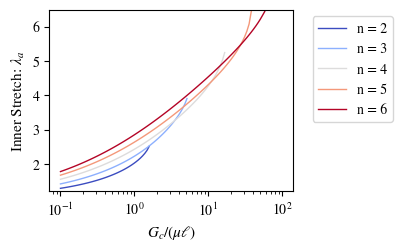

[OK] Plotted 1 file(s) from ../data/data/Gc_over_mu_ell -> ../data/figures/Gc_over_mu_ell


In [11]:
# --- User inputs (edit these) ---
WHICH   = "Gc_over_mu_ell"          # "B_over_A" or "Gc_over_mu_ell" or "ell_over_A"
RAW_ROOT = "../data/data"     # root containing RAW_ROOT/<WHICH>/*.json
OUT_ROOT = "../data/figures"  # where plots are saved

PATTERN = "Neumann_PD_Gc_over_mu_ell_2026-01-04_A=0.3333333333333333_B=1.0_ell_over_A=1.0_C=20.0_mu=1.0.json"            # or general, e.g. "*.json"
PLOT_MODES = True
SHOW = True

run(
    which=WHICH,
    raw_root=RAW_ROOT,
    out_root=OUT_ROOT,
    pattern=PATTERN,
    plot_modes=PLOT_MODES,
    show=SHOW,
)
